20.07.2019 al 31.07.2019

In [1]:
import pandas as pd
import tools
from datetime import datetime
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import datetime as dt

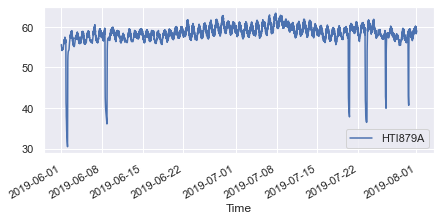

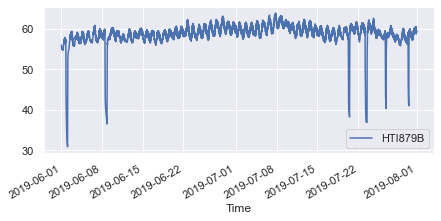

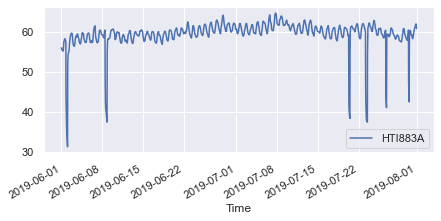

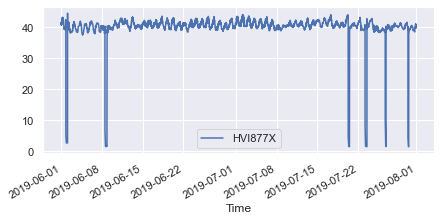

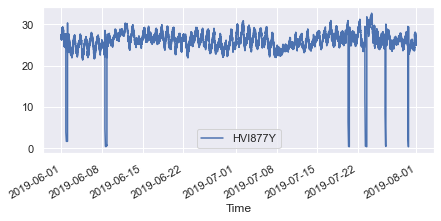

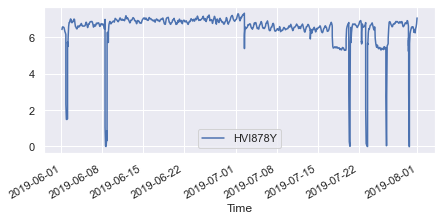

In [2]:
df_1 = pd.read_csv(r'..\data\untouched_data\mot_electric\2018\HTI879A.csv', sep=';')
df_2 = pd.read_csv(r'..\data\untouched_data\mot_electric\2018\HTI879B.csv', sep=';')
df_3 = pd.read_csv(r'..\data\untouched_data\mot_electric\2018\HTI883A.csv', sep=';')
df_4 = pd.read_csv(r'..\data\untouched_data\mot_electric\2018\HVI877X.csv', sep=';')
df_5 = pd.read_csv(r'..\data\untouched_data\mot_electric\2018\HVI877Y.csv', sep=';')
df_6 = pd.read_csv(r'..\data\untouched_data\mot_electric\2018\HVI878Y.csv', sep=';')
df_1['Time'] = pd.to_datetime(df_1['Time'], format=tools.date_format)
df_2['Time'] = pd.to_datetime(df_2['Time'], format=tools.date_format)
df_3['Time'] = pd.to_datetime(df_3['Time'], format=tools.date_format)
df_4['Time'] = pd.to_datetime(df_4['Time'], format=tools.date_format)
df_5['Time'] = pd.to_datetime(df_5['Time'], format=tools.date_format)
df_6['Time'] = pd.to_datetime(df_6['Time'], format=tools.date_format)
splits = ['01/06/2019','01/07/2019','01/08/2019']
d_1 = datetime.strptime(splits[0], "%d/%m/%Y")
d_2 = datetime.strptime(splits[2], "%d/%m/%Y")
df_1 = df_1.set_index('Time').sort_index()[d_1:d_2]
df_2 = df_2.set_index('Time').sort_index()[d_1:d_2]
df_3 = df_3.set_index('Time').sort_index()[d_1:d_2]
df_4 = df_4.set_index('Time').sort_index()[d_1:d_2]
df_5 = df_5.set_index('Time').sort_index()[d_1:d_2]
df_6 = df_6.set_index('Time').sort_index()[d_1:d_2]
tools.plot_df(df_1)
tools.plot_df(df_2)
tools.plot_df(df_3)
tools.plot_df(df_4)
tools.plot_df(df_5)
tools.plot_df(df_6)

Train starts at 2019-06-01 00:15:03 and ends at 2019-06-30 23:59:03
Test starts at 2019-07-01 00:09:03 and ends at 2019-07-31 23:52:18
C:\Users\ian.palacin\Anaconda3\envs\datti_2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Mahalanobis distance')

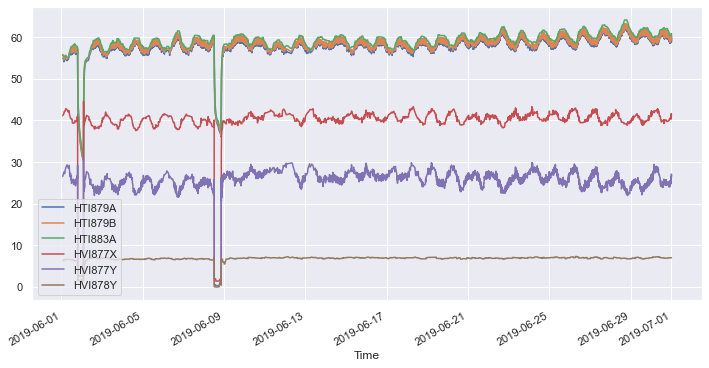

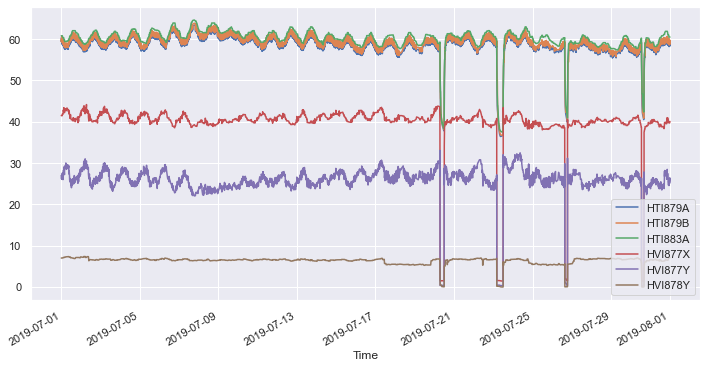

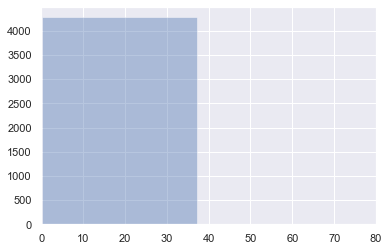

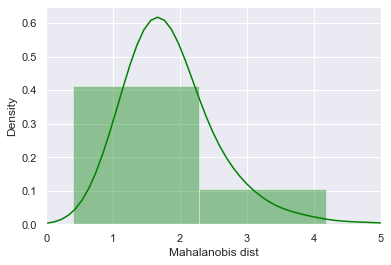

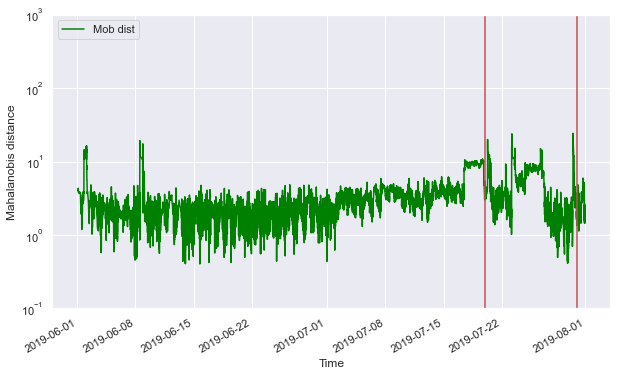

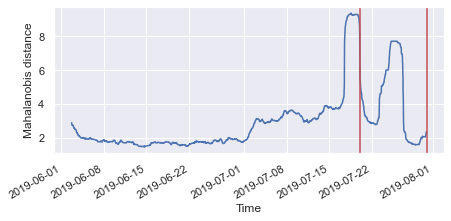

In [3]:
df_list = [df_1, df_2, df_3, df_4, df_5, df_6]
dataset_train, dataset_test = tools.init_datasets_prepared(df_list, splits,resample=False, resample_time='5Min')
tools.plot_train(dataset_train)
tools.plot_train(dataset_test)
dist_test, dist_train, threshold, anomaly_alldata = tools.dists_and_anomalies(dataset_train.dropna(), dataset_test.dropna(), components=len(df_list))
#dist_test, dist_train, threshold, anomaly_alldata = tools.dists_and_anomalies(dataset_train.dropna(), dataset_test.dropna(), components=2)


tools.plot_M_distance_squared(dist_train, scale=80)
tools.plot_M_distance(dist_train)
tools.plot_anomaly_metric(anomaly_alldata)
plt.axvline(dt.datetime(2019, 7, 20), color='r')
plt.axvline(dt.datetime(2019, 7, 31), color='r')
plt.ylabel('Mahalanobis distance')
mob_dist = anomaly_alldata['Mob dist']
f,ax=plt.subplots(figsize=(7,3))
mob_dist.rolling(window=300,center=True).median().plot(ax=ax)
plt.axvline(dt.datetime(2019, 7, 20), color='r')
plt.axvline(dt.datetime(2019, 7, 31), color='r')
plt.ylabel('Mahalanobis distance')

C:\Users\ian.palacin\Anaconda3\envs\datti_2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 60.0)

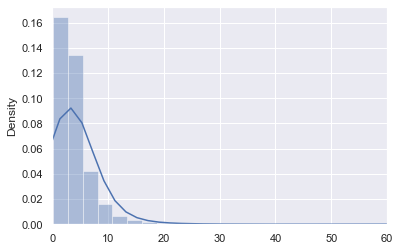

In [27]:
import seaborn as sns
plt.figure()
sns.distplot(np.square(dist_train),
                            bins=140,
                            kde=True)
plt.xlim([0.0,60])

C:\Users\ian.palacin\Anaconda3\envs\datti_2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Mahalanobis dist')

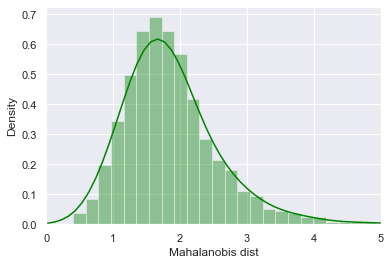

In [37]:
plt.figure()
sns.distplot(dist_train,
                bins = 100, 
                kde= False, 
                color = 'green')
plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')